In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

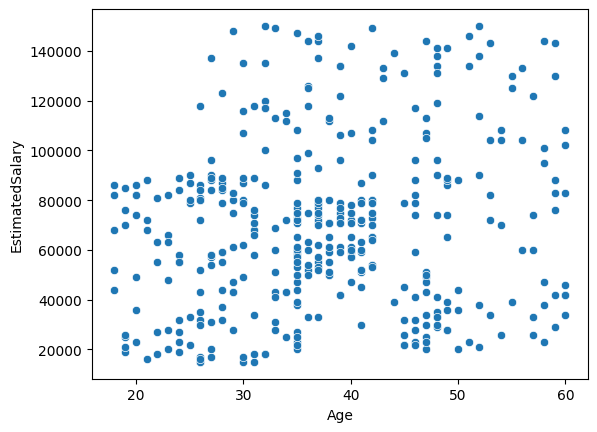

In [5]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5756 - loss: 1371.8903 - val_accuracy: 0.4000 - val_loss: 328.8301
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4789 - loss: 326.5760 - val_accuracy: 0.6000 - val_loss: 111.0636
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5027 - loss: 161.6128 - val_accuracy: 0.6000 - val_loss: 267.7796
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6052 - loss: 142.1682 - val_accuracy: 0.6000 - val_loss: 217.7074
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5619 - loss: 184.9525 - val_accuracy: 0.6000 - val_loss: 133.7565
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5649 - loss: 94.4957 - val_accuracy: 0.4000 - val_loss: 30.7484
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4737 - loss: 30.6014 - val_accuracy: 0.4000 - val_loss: 69.1475
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4263 - loss: 68

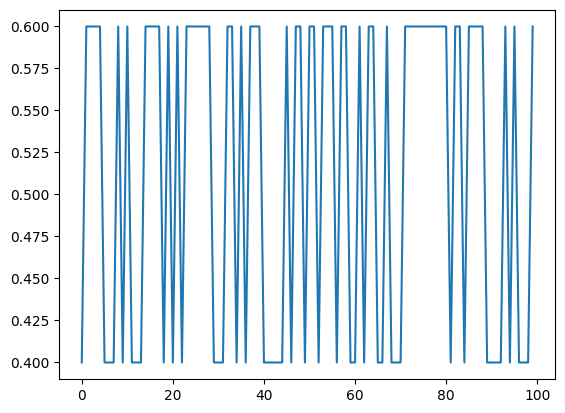

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [14]:
# Applying scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

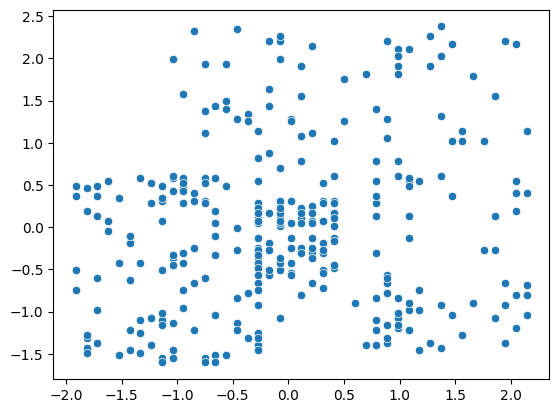

In [18]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])

In [19]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.4964 - loss: 0.6896 - val_accuracy: 0.7750 - val_loss: 0.6346
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8036 - loss: 0.6291 - val_accuracy: 0.7750 - val_loss: 0.5801
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7762 - loss: 0.5790 - val_accuracy: 0.7750 - val_loss: 0.5337
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8186 - loss: 0.5451 - val_accuracy: 0.7750 - val_loss: 0.4957
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8230 - loss: 0.5041 - val_accuracy: 0.7750 - val_loss: 0.4637
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8483 - loss: 0.4816 - val_accuracy: 0.7750 - val_loss: 0.4362
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8411 - loss: 0.4469 - val_accuracy: 0.7875 - val_loss: 0.4131
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8664 - loss: 0.4112 - val_accuracy: 0.8125 - val_l

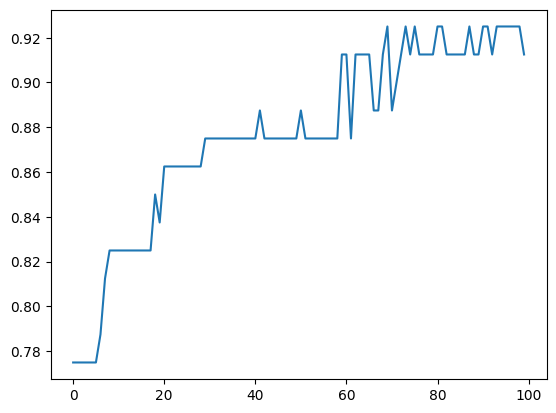

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])